In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from collections import *
import sklearn.metrics as skm

import helper_funcs as helper
reload(helper)

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 50

## Data Exploration

In [2]:
train_df = pd.read_csv('data/training.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
shape = pd.DataFrame.from_items([('train_df',train_df.shape),
                                 ('test_df',test_df.shape)], orient='index',columns=['row','cols'])

display(shape)

,row,cols
train_df,72983,34
test_df,48707,33


In [4]:
train_df['IsBadBuy'].value_counts() ### unbalanced data

0    64007
1     8976
Name: IsBadBuy, dtype: int64

##### First insight
This dataset is an imbalanced-class data. We may not be able to apply the conventional machinle learning algorithms directly to the data. And metrics such as accurary will not be a good choice for this problem. 

Now do an intial tailoring for the dataset. 

In [5]:
train_df.dropna(axis = 0, how = 'any').shape ## have deleted too many entries

(3276, 34)

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = train_df.select_dtypes(numerics)
cat_df = train_df.select_dtypes(exclude=numerics)

total_cols = len(train_df[3:].columns)

## initial clean up for dataframe, drop entries wiht more than 70% of features are NaN's
train_df.dropna(axis=0, thresh=np.floor(0.7*total_cols), inplace=True)
test_df.dropna(axis=0, thresh=np.floor(0.7*total_cols), inplace=True)

In [7]:
shape = pd.DataFrame.from_items([('train_df',train_df.shape),
                                 ('test_df',test_df.shape)], orient='index',columns=['row','cols'])

display(shape)

,row,cols
train_df,72983,34
test_df,48707,33


In [8]:
train_df['IsBadBuy'].value_counts() ### unbalanced data

0    64007
1     8976
Name: IsBadBuy, dtype: int64

First I tried to drop data instantce wherever there is an NA value. However, but doing so, the dataset is reduced by about 96% of the data, which is undesired. For the second attempt, I tried to drop only instances with more that 70% of NA column valules, which turned out that no instance was drop. Now let's get a summary of the descriptive statics about the data. 

### Descriptive Statistics

In [9]:
train_description = helper.getStat(train_df)

In [10]:
train_description

,25%,50%,75%,distinct,max,mean,min,missing,std
RefId,18257.5,36514.0,54764.5,72983.0,73014.0,36511.428497,1.0,0.0,21077.241302
IsBadBuy,0.0,0.0,0.0,2.0,1.0,0.122988,0.0,0.0,0.328425
VehYear,2004.0,2005.0,2007.0,10.0,2010.0,2005.343052,2001.0,0.0,1.731252
VehicleAge,3.0,4.0,5.0,10.0,9.0,4.176644,0.0,0.0,1.712210
WheelTypeID,1.0,1.0,2.0,4.0,3.0,1.494299,0.0,3169.0,0.521290
VehOdo,61837.0,73361.0,82436.0,39947.0,115717.0,71499.995917,4825.0,0.0,14578.913128
MMRAcquisitionAuctionAveragePrice,4273.0,6097.0,7765.0,10342.0,35722.0,6128.909217,0.0,18.0,2461.992768
MMRAcquisitionAuctionCleanPrice,5406.0,7303.0,9021.0,11379.0,36859.0,7373.636031,0.0,18.0,2722.491986
MMRAcquisitionRetailAveragePrice,6280.0,8444.0,10651.0,12725.0,39080.0,8497.034332,0.0,18.0,3156.285284
MMRAcquisitonRetailCleanPrice,7493.0,9789.0,12088.0,13456.0,41482.0,9850.928240,0.0,18.0,3385.789541


From this table, we can see that there are 95% of the PRIMEUNIT and AUCGUART columns are missing values, other than that, WheelTypeID Trim and WheelType have around 3000 missing values, although they are not so much comparing to the whole data set, yet WheelTypeID and WheelType are actually giving the same information, we can drop one of them. The others can be imputed as unkonwn for the categorical features and median for the numerical features. 

### Variable Covariance

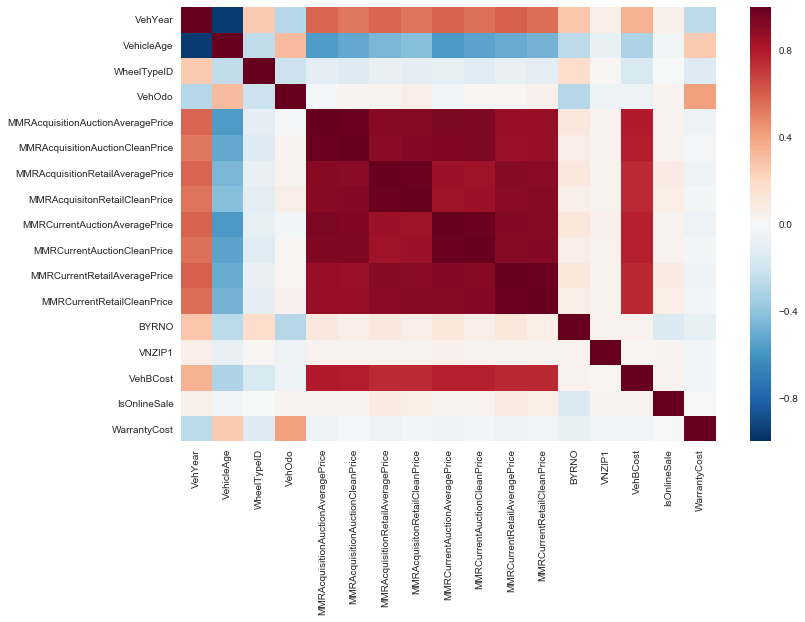

In [11]:
corr = train_df.drop(['RefId','IsBadBuy'],1).corr()
plt.figure(figsize = (12,8))
sb.heatmap(corr) 

This heatmap shows the correlation inbetween any two of the numberical features. Altought high correlated features tend to give similar information and may be redundant. However at this point, we can not say for sure if they are indeed redudant. As a result, I also checked on how each of them contributes to the target variable using the mutual information. 

### Get Mutual information of each preditor to the label

,column,MI
0,RefId,0.182469
1,PRIMEUNIT,0.181799
2,AUCGUART,0.181798
3,VehOdo,0.117158
4,WheelType,0.103684
5,WheelTypeID,0.103638
6,MMRCurrentRetailCleanPrice,0.060855
7,MMRCurrentRetailAveragePrice,0.058303
8,MMRAcquisitonRetailCleanPrice,0.057587
9,MMRAcquisitionRetailAveragePrice,0.055872


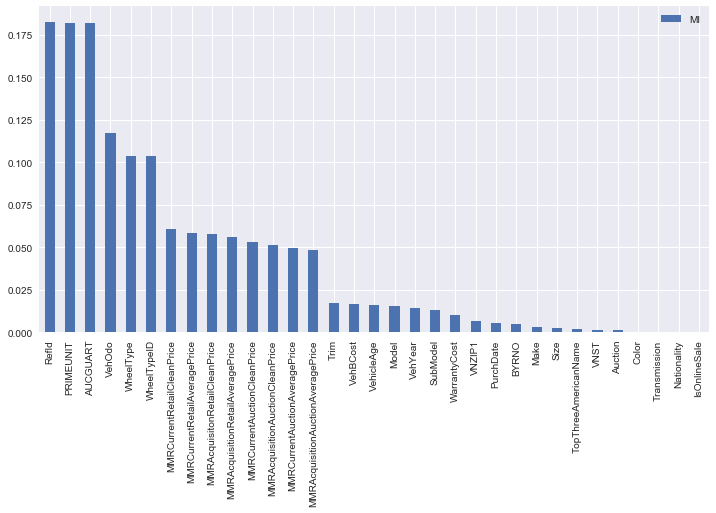

In [12]:
helper.get_MI(train_df, 'IsBadBuy', plot=True, df_display=True)

As we can see from here, the high-correlated features actually contributes quite a lot of information compared the lots of the others. RefID is just the ordinal index of the instances, which should be dropped for modeling. The hight-correlated features and the unbalanced target classes may suggest a tree-based model is better for the problem.

### Feature selection & data processing
From here, I would like to do the following deletion of the original features:

1) As the last 4 columns (i.e. Color, Transmission, Nationality, IsOnlineSale according to the MI plot) carry so little information about the target, I decided to drop them. 

2) In addtion, as PRIMEUNIT and AUCGUART have a lot of missing values (69564 out of 72983 entries),they are dropped as well. 

3) WheelTypeID is dropped as it gives identical information as WheelType does. Same resaon apply to VNZIP (also, VNZIP is divided into much finer categories, using VNZIP already provide enough region infomation as using for a frist-thought model, yet since this feature contains so many categories, I decided to drop them.)

4) BYRNO, and RefID are dropped as they do not contribute significant information.

5) Model, SubModel and Trim columns are dropped, they involves so many categories. 

6) PurchDate is dropped as time should be considered separately.

Then for the rest of features, impute them in the aforementioned way then apply one-hot encoding on the categorical ones. This will then increase the number of features for the later model.

In [13]:
"""since the train data and test data may not contain the same information for each column concatenating them for 
the preprocessing is to avoid missing ceating dummy columns

The preprocess function includes dropping un-needed columns, imputation and creating one-hot encoding 
"""
whole_df = pd.concat([train_df, test_df])
whole_df2 = helper.preprocess(whole_df)

In [14]:
whole_df2.shape

(121690, 71)

In [15]:
train_df2 = whole_df2.iloc[:72983:, :]
test_df2 = whole_df2.iloc[72983::, :].drop(["IsBadBuy"],1)

After this data processing, features has increased to 588.

###### Since there is a time feature, we can make a simple time series plot to see how the trend of the badbuy is

In [16]:
train_df.PurchDate.describe()

count          72983
unique           517
top       11/23/2010
freq             384
Name: PurchDate, dtype: object

In [17]:
ts = train_df[['PurchDate','IsBadBuy']]
ts.PurchDate = pd.to_datetime(ts.PurchDate) ### change PurchDate type from Object to datetime

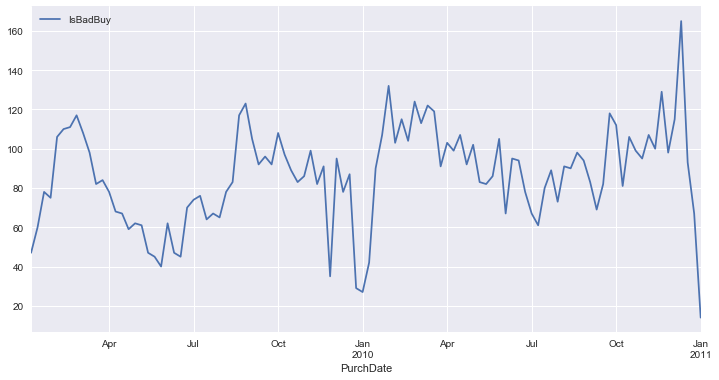

In [18]:
ts = ts.set_index('PurchDate')
ts.resample("1W",how=np.sum).plot(figsize=(12,6))

It appears to have a seasonality in the number of badbuys, such as a drop in Spring through summer, further analsis may be needed.

## Model

As the class distribution in the target is very imbalanced, tree-based model should be a good candidate. In addition, gradient boosting algorithms are good for inblalanced class problems as well. Here I chose to use a simple boosting method which is an AdaBoost with a tree stum as the base classifier. As we know, the accuracy is not a good evaluation metric for imbalanced class problems, I have chosen the ROC-AUC as the model evaluation metric for this problem. 

In [19]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import time

In [20]:
### split training data into 70% of training and 30% of validation 
X, y = train_df2.iloc[:, 1::].values, train_df2.iloc[:, 0].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
Ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=11))

###### default AdaBoost

In [22]:
Ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=11, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [23]:
skm.roc_auc_score(y_train, Ada.predict_proba(X_train)[:,1])

0.75578076517956261

In [24]:
skm.roc_auc_score(y_val, Ada.predict_proba(X_val)[:,1])

0.75217077656449427

###### grid search for a better combination of hyperparameters

In [25]:
param_grid =  {"n_estimators": [100, 500],
              "learning_rate":[0.1, 0.5],
               "base_estimator__max_features":["auto",0.3]
              }

In [26]:
grid_search_ada = GridSearchCV(Ada, param_grid=param_grid, scoring='roc_auc')

In [27]:
start = time.time()
grid_search_ada.fit(X_train, y_train)
print (time.time()- start)/60.

4.69675765038


In [28]:
grid_search_ada.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=0.3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=11, splitter='best'),
          learning_rate=0.1, n_estimators=500, random_state=None)

In [29]:
grid_search_ada.best_score_

0.74772581252396975

In [30]:
skm.roc_auc_score(y_val, grid_search_ada.best_estimator_.predict_proba(X_val)[:,1])

0.75512543706549984

In [31]:
X_test = test_df2.values

In [32]:
pd.DataFrame({"RefId": test_df.RefId, "IsBadBuy":grid_search_ada.best_estimator_.predict(X_test)}, columns=['RefId','IsBadBuy']).to_csv("output.csv", index=False)

#### Summary

As for the model, I first split the training dataset intor  70% of training and 30% of validation sets. Then tried a few combination of the hyperparameters for model tuning. For the very rough tuning process, all combinations I have tried yielded an ROC-AUC score around 0.75. I have also uploaded the predicted output for the test to the Kaggle competiton which has a ranking about 500. This has suggested that there are better models and algorithms for this problem. And indeed it should have. 

As for this simple model, one thing to improvie it is to fine tune it further (e.g. cross-validating the tree parameter, lower lerning rate with more estimators, and so on) , which may take much longer to train. 

As the biggest issue in the problem is that the data is very imbalanced, preprocessing of the data with  over-sampling or down-sampling for the data may possibly boost the performance before we apply this simple AdaBoost model. Besides that, other boosting methods such as XGBoost should be tried for this problem, as XGBoost can handle imblanced data so well, even resampling may not needed as well. 